# Agregagador de CSV's

Agrega os csv's de cada órgão em um só csv (remuneracao_servidores.csv), criando os atributos 'ORGAO', 'ANO' e 'MES'. 

In [2]:
import pandas as pd
import os
import re

#Lista os diretórios do caminho 'path'
def lista_dirs(path):
    dirs=[]
    # r=raiz, d=diretorios, f = arquivos
    for r, d, f in os.walk(path):
        for direc in d:
            print(direc)
            if '.txt' not in direc:
                dirs.append(os.path.join(r, direc))
    return dirs

#lista os arquivos '.csv' do caminho 'path'
def lista_arqs(path):
    files = []
    # r=raiz, d=diretorios, f = arquivos
    for r, d, f in os.walk(path):
        for file in f:
            if '.csv' in file:
                f_out = os.path.join(r, file)
                files.append(f_out)
    return files

# Cria o DataFrame de todos os órgãos
def cria_df_orgao(path):
    files = lista_arqs(path)
    df_orgao = pd.DataFrame()
    for f in files:
        if '.csv' in f:
            df_mes = pd.read_csv(f, sep=';', header=0, decimal=',')
            
            file_name = f.split("_")[1]
            orgao_name = path.split("/")[1]
            
            mes = file_name[4:6]
            ano = file_name[0:4]
            
            df_mes["ANO"] = ano
            df_mes["MES"] = mes
            
            df_orgao= pd.concat([df_orgao, df_mes], ignore_index=True)
            df_orgao["ORGAO"] = orgao_name
    try:
        df_orgao.drop(['Unnamed: 10'], axis=1, inplace=True)
    except:
        print('Sem Coluna Unnamed')
    return df_orgao

def cria_df_geral(path):
    df_geral = pd.DataFrame()
    dirs = lista_dirs(path)
    for d in dirs:
        if (str(d) == "csv/PM-ATIVOS" or str(d) == "csv/FUNDAÇÃO VILA OLIMPICA" or str(d)=="csv/PRODAM"):
            continue
        print("Processando diretório:", str(d))
        nome_dir = d.split("/")[1]
        ds_orgao = pd.DataFrame()
        df_orgao = cria_df_orgao(d)
        df_geral = pd.concat([df_geral,df_orgao], ignore_index=True)
        df_geral = trata_nan(df_geral)
    return df_geral

def trata_nan(df):
    for col in df.columns:
        if(df[col].dtype == 'object'):
            df[col] = df[col].fillna('-')
        if(df[col].dtype == 'float64'):
            df[col] = df[col].fillna(0.00)
    
    return df

def main():
    path = 'csv/'
    df_geral = cria_df_geral(path)
    df_geral.to_csv(r'remuneracao_servidores.csv')
    print (df_geral)
        
main()

CGE
PM-ATIVOS
SRMM
SEAD-PENSÃO HANSENIANOS
SEINFRA
SERIRA
CBMAM
SNPH
FMT-AM
SPF
SEIND
FAPEAM
SEPED
CETAM
ALFREDO DA MATA
FUNDAÇÃO AMAZONPREV
SEPROR
SEJUSC
SEAD
SSP
IPEM-AM
IDAM
FUNTEC
SEPLANCTI
IPAAM
UEA
PENSIONISTAS
SETRAB
SEDUC
SEJEL
IMPRENSA OFICIAL
PRODAM
UGPE
CGL
CASA CIVIL DO GOVERNO
SEC
FVS
SEAS
SEMA
FHEMOAM
DETRAN
FEI
ERGSP
SEAD-PENSÃO ESPECIAL II
FUNDAÇÃO VILA OLIMPICA
FEH
SECOM
CASA MILITAR
ADS
VICE-GOVERNADORIA
SUHAB
JUCEA
FCECON
CB-CIVIS
POLICIA CIVIL
SUSAM
SEFAZ
AMAZONPREV
SEAD-PENSÃO ESPECIAL I
PGE
SEAP
ADAF
ARSAM
PM-CIVIS
FHAJ
OUVIDORIA GERAL
Processando diretório: csv/CGE


/home/vini/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Processando diretório: csv/SRMM
Processando diretório: csv/SEAD-PENSÃO HANSENIANOS
Processando diretório: csv/SEINFRA
Processando diretório: csv/SERIRA
Processando diretório: csv/CBMAM
Processando diretório: csv/SNPH
Processando diretório: csv/FMT-AM
Processando diretório: csv/SPF
Processando diretório: csv/SEIND
Sem Coluna Unnamed
Processando diretório: csv/FAPEAM
Processando diretório: csv/SEPED
Processando diretório: csv/CETAM
Processando diretório: csv/ALFREDO DA MATA
Processando diretório: csv/FUNDAÇÃO AMAZONPREV
Processando diretório: csv/SEPROR
Processando diretório: csv/SEJUSC
Processando diretório: csv/SEAD
Processando diretório: csv/SSP
Processando diretório: csv/IPEM-AM
Processando diretório: csv/IDAM
Processando diretório: csv/FUNTEC
Processando diretório: csv/SEPLANCTI
Processando diretório: csv/IPAAM
Processando diretório: csv/UEA
Processando diretório: csv/PENSIONISTAS
Processando diretório: csv/SETRAB
Processando diretório: csv/SEDUC
Processando diretório: csv/SEJEL
Pro

# Plotagens

#### Carrega o arquivo 'remuneracao_servidores.csv' e cria um DataFrame a partir dele.

In [3]:
import matplotlib.pyplot as plt

file_path = r'remuneracao_servidores.csv'
rem_org = pd.read_csv(file_path, sep=',', header=0, decimal='.')

try:       
    rem_org.drop('Unnamed: 0', axis=1, inplace=True)
except:
    print("no unnamed column.")
        
rem_org = rem_org.sort_values(by=['ANO', 'ORGAO', 'MES'])
# rem_org = rem_org.sort_values(['ANO'])
        
loc_orgao = rem_org["ORGAO"] == 'UEA'
anos = rem_org["ANO"].drop_duplicates()
orgaos = rem_org["ORGAO"].drop_duplicates()

rem_org.rename(columns={' REMUNERACAO LEGAL DEVIDA(R$)' : 'REMUNERACAO LEGAL DEVIDA(R$)'}, inplace=True)

### Remuneração Legal Devida por mês

Remuneração do mês < R$100.000

In [ ]:
data = []
plt.figure(figsize=[20,10])
for orgao in orgaos:
    print(orgao)
    maioir = 0
    orgao_tots = []
    
#     if(orgao != 'UEA' and orgao != 'SEAD'):
#         continue
        
    for ano in anos:
        
        if (ano < 2017):
            continue
#         print("###", ano)
        meses = rem_org['MES'].drop_duplicates()
        
        for mes in meses:
#             print("######", mes, end=': ')
            rem = rem_org[(rem_org['ANO'] == ano) & (rem_org['ORGAO'] == orgao) & (rem_org['MES'] == mes)]
            rem = rem[['REMUNERACAO LEGAL DEVIDA(R$)', 'ORGAO']]
            rem = rem['REMUNERACAO LEGAL DEVIDA(R$)'].sum()
            if (rem > maior):
                maior = rem
#             print(rem)
            orgao_tots.append(rem)
            data.append(str(mes) + "/" + str(ano))
#     print(maior)
    if (maior < 100000):
        plt.plot(orgao_tots, label = orgao)
        plt.legend(loc=0)
        ax = plt.xticks(range(len(orgao_tots)),data, rotation = 90)
        print("foi")

 100.000 <= Remuneração do mês < 1.000.000

ADS
foi
FHEMOAM
foi
SECOM
foi
SEAD
foi
SEAD-PENSÃO ESPECIAL I
foi
SEAD-PENSÃO HANSENIANOS
foi
SERIRA
foi
ADAF
foi
ALFREDO DA MATA
foi
ARSAM
foi
CASA CIVIL DO GOVERNO
foi
CASA MILITAR
foi
CB-CIVIS
foi
CBMAM
foi
CETAM
foi
CGE
foi
CGL
foi
DETRAN
foi
ERGSP
foi
FAPEAM
foi
FCECON
foi
FEI
foi
FHAJ
foi
FMT-AM
foi
FUNDAÇÃO AMAZONPREV
foi
FUNTEC
foi
FVS
foi
IDAM
foi
IMPRENSA OFICIAL
foi
IPAAM
foi
IPEM-AM
foi
JUCEA
foi
OUVIDORIA GERAL
foi
PGE
foi
PM-CIVIS
foi
POLICIA CIVIL
SEAD-PENSÃO ESPECIAL II
foi
SEAP
foi
SEAS
foi
SEC
foi
SEFAZ
SEINFRA
foi
SEJEL
foi
SEJUSC
foi
SEMA
foi
SEPED
foi
SEPLANCTI
foi
SEPROR
foi
SETRAB
foi
SNPH
foi
SPF
foi
SRMM
foi
SSP
foi
SUHAB
foi
SUSAM
UEA
UGPE
foi
VICE-GOVERNADORIA
foi
AMAZONPREV
PENSIONISTAS
SEDUC


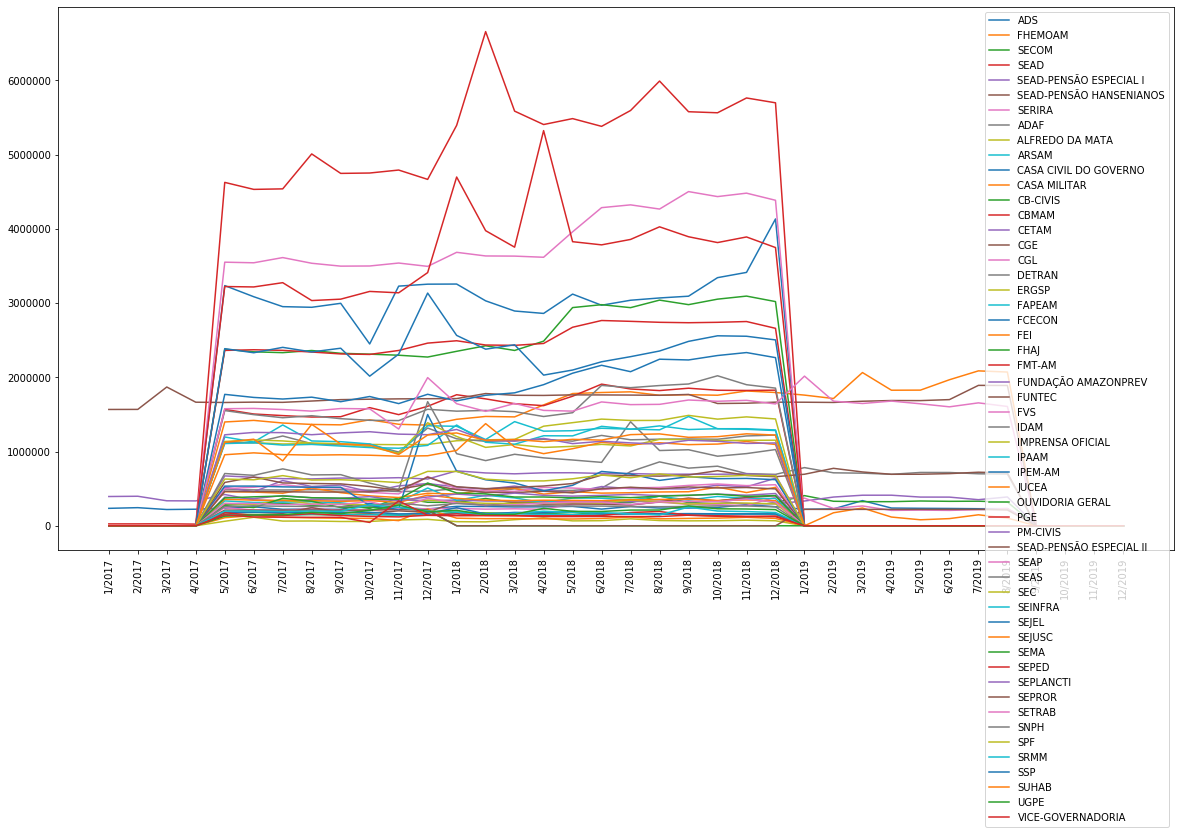

In [50]:
data = []
plt.figure(figsize=[20,10])
for orgao in orgaos:
    print(orgao)
    
    orgao_tots = []
    maior = 0
#     if(orgao != 'UEA' and orgao != 'SEAD'):
#         continue
        
    for ano in anos:
        
        if (ano < 2017):
            continue
#         print("###", ano)
        meses = rem_org['MES'].drop_duplicates()
        
        for mes in meses:
#             print("######", mes, end=': ')
            rem = rem_org[(rem_org['ANO'] == ano) & (rem_org['ORGAO'] == orgao) & (rem_org['MES'] == mes)]
            rem = rem[['REMUNERACAO LEGAL DEVIDA(R$)', 'ORGAO']]
            rem = rem['REMUNERACAO LEGAL DEVIDA(R$)'].sum()
            if (rem > maior):
                maior = rem
#             print(rem)
            orgao_tots.append(rem)
            data.append(str(mes) + "/" + str(ano))
#     print(maior)
    if (maior >= 100000 and maior < 10000000):
        plt.plot(orgao_tots, label = orgao)
        plt.legend(loc=0)
        ax = plt.xticks(range(len(orgao_tots)),data, rotation = 90)
        print("foi")

 1.000.000 <= Remuneração do mês < 10.000.000

In [ ]:
data = []
plt.figure(figsize=[20,10])
for orgao in orgaos:
    print(orgao)
    maior = 0
    orgao_tots = []
    
#     if(orgao != 'UEA' and orgao != 'SEAD'):
#         continue
        
    for ano in anos:
        
        if (ano < 2017):
            continue
#         print("###", ano)
        meses = rem_org['MES'].drop_duplicates()
        
        for mes in meses:
#             print("######", mes, end=': ')
            rem = rem_org[(rem_org['ANO'] == ano) & (rem_org['ORGAO'] == orgao) & (rem_org['MES'] == mes)]
            rem = rem[['REMUNERACAO LEGAL DEVIDA(R$)', 'ORGAO']]
            rem = rem['REMUNERACAO LEGAL DEVIDA(R$)'].sum()
            if (rem > maior):
                maior = rem
#             print(rem)
            orgao_tots.append(rem)
            data.append(str(mes) + "/" + str(ano))
#     print(maior)
    if (maior >= 1000000 and maior < 10000000):
        plt.plot(orgao_tots, label = orgao)
        plt.legend(loc=0)
        ax = plt.xticks(range(len(orgao_tots)),data, rotation = 90)
        print("foi")

ADS
FHEMOAM
foi
SECOM
SEAD
foi
SEAD-PENSÃO ESPECIAL I
SEAD-PENSÃO HANSENIANOS
foi
SERIRA
ADAF
ALFREDO DA MATA
foi
ARSAM
CASA CIVIL DO GOVERNO
foi
CASA MILITAR
CB-CIVIS
CBMAM
foi
CETAM
CGE
CGL
DETRAN
foi
ERGSP
FAPEAM
FCECON
foi
FEI
FHAJ
foi
FMT-AM
foi
FUNDAÇÃO AMAZONPREV
FUNTEC
FVS
foi
IDAM
foi
IMPRENSA OFICIAL


Remuneração do mês > 10.000.000

In [ ]:
data = []
plt.figure(figsize=[20,10])
for orgao in orgaos:
    print(orgao)
    maior = 0
    orgao_tots = []
    
#     if(orgao != 'UEA' and orgao != 'SEAD'):
#         continue
        
    for ano in anos:
        
        if (ano < 2017):
            continue
#         print("###", ano)
        meses = rem_org['MES'].drop_duplicates()
        
        for mes in meses:
#             print("######", mes, end=': ')
            rem = rem_org[(rem_org['ANO'] == ano) & (rem_org['ORGAO'] == orgao) & (rem_org['MES'] == mes)]
            rem = rem[['REMUNERACAO LEGAL DEVIDA(R$)', 'ORGAO']]
            rem = rem['REMUNERACAO LEGAL DEVIDA(R$)'].sum()
            if (rem > maior):
                maior = rem
#             print(rem)
            orgao_tots.append(rem)
            data.append(str(mes) + "/" + str(ano))
#     print(maior)
    if (maior >= 10000000 and maior < 100000000):
        plt.plot(orgao_tots, label = orgao)
        plt.legend(loc=0)
        ax = plt.xticks(range(len(orgao_tots)),data, rotation = 90)
        print("foi")

Remuneração do mês > R$100.000.000

ADS
FHEMOAM
SECOM
SEAD
SEAD-PENSÃO ESPECIAL I
SEAD-PENSÃO HANSENIANOS
SERIRA
ADAF
ALFREDO DA MATA
ARSAM
CASA CIVIL DO GOVERNO
CASA MILITAR
CB-CIVIS
CBMAM
CETAM
CGE
CGL
DETRAN
ERGSP
FAPEAM
FCECON
FEI
FHAJ
FMT-AM
FUNDAÇÃO AMAZONPREV
FUNTEC
FVS
IDAM
IMPRENSA OFICIAL
IPAAM
IPEM-AM
JUCEA
OUVIDORIA GERAL
PGE
PM-CIVIS
POLICIA CIVIL
SEAD-PENSÃO ESPECIAL II
SEAP
SEAS
SEC
SEFAZ
SEINFRA
SEJEL
SEJUSC
SEMA
SEPED
SEPLANCTI
SEPROR
SETRAB
SNPH
SPF
SRMM
SSP
SUHAB
SUSAM
foi
UEA
UGPE
VICE-GOVERNADORIA
AMAZONPREV
foi
PENSIONISTAS
SEDUC
foi


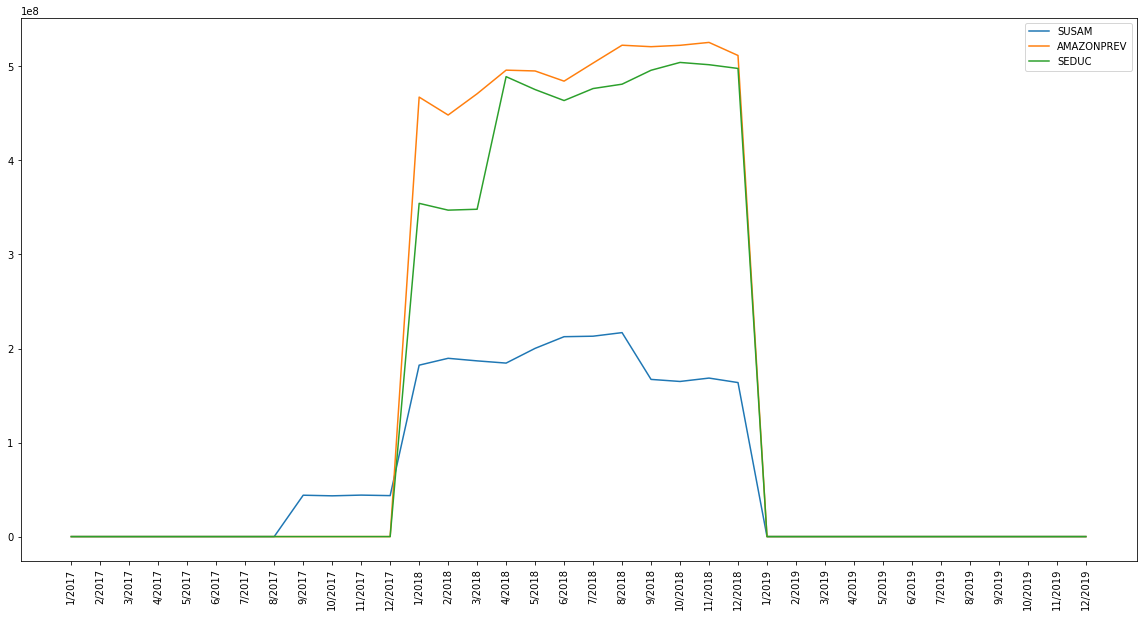

In [42]:
c_org = 0
data = []
plt.figure(figsize=[20,10])
for orgao in orgaos:
    
    maior = 0
    orgao_tots = []
    
#     if(orgao != 'AMAZONPREV' and orgao != 'SUSAM' and orgao != 'SEDUC'):
#         continue
    print(orgao)    
    for ano in anos:
        
        if (ano < 2017):
            continue
#         print("###", ano)
        meses = rem_org['MES'].drop_duplicates()
        
        for mes in meses:
#             print("######", mes, end=': ')
            rem = rem_org[(rem_org['ANO'] == ano) & (rem_org['ORGAO'] == orgao) & (rem_org['MES'] == mes)]
            rem = rem[['REMUNERACAO LEGAL DEVIDA(R$)', 'ORGAO']]
            rem = rem['REMUNERACAO LEGAL DEVIDA(R$)'].sum()
            if (rem > maior):
                maior = rem
#             print(rem)
            orgao_tots.append(rem)
            data.append(str(mes) + "/" + str(ano))
    if (maior >= 100000000):
        plt.plot(orgao_tots, label = orgao)
        plt.legend(loc=0)
        ax = plt.xticks(range(len(orgao_tots)),data, rotation = 90)
        print("foi")
        
    c_org += 1